## **Universidad del Valle de Guatemala**
##### Departamento de Computación - Simulación y Modelación - Catedrático: Oceas Paredes
---
#### **Estudiante:** Rudik Roberto Rompich 
#### **Carrera:** Licenciatura en Matemática Aplicada 
#### **Carné:** 19857
---
# **Microproyecto 1**
### Fecha de entrega: ***7 de agosto de 2021***

---

In [166]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

> **Problema 1.** Strassel Investors compra bienes raíces, los desarrolla y vende para obtener una utilidad. Una nueva propiedad está disponible, y Bud Strassel, el presidente y propietario de esta empresa, cree que puede venderla en \$160,000. El propietario actual de la finca solicitó ofertas y declaró que la propiedad se vendería a la oferta más alta de más de \$100,000. Dos competidores harán ofertas por la propiedad. Strassel no sabe cuánto ofrecerán los competidores, pero supone para propósitos de planeación que la suma ofrecida por cada competidor estará uniformemente distribuida entre \$100,000 y \$150,000.	



>> 1.   Desarrolle un modelo estocástico para simular las ofertas hechas por los dos competidores. Strassel considera una oferta de \$130,000.00 por la propiedad. Utilizando una simulación de 2000 ensayos, ¿cuál es la estimación de la probabilidad de que Strassel sea capaz de obtener la propiedad con una oferta de \$130,000.00? 

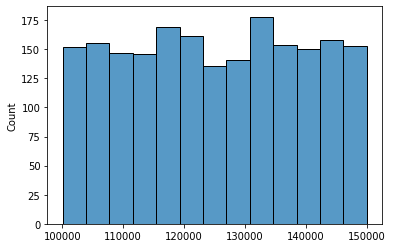

In [167]:
precio_de_venta_aproximado = 160000
data_2000_ensayos= np.random.uniform(100000,150000,2000)
sns.histplot(data_2000_ensayos)

La probabilidad de obtenerlo es:

In [168]:
probabilidad =[]
for elemento in data_2000_ensayos: 
  if elemento <= 130000:
    probabilidad.append(elemento) 
print(len(probabilidad)/len(data_2000_ensayos))

0.5895


>> 2.   ¿Cuánto necesita ofrecer Strassel para asegurarse de obtener la propiedad? ¿Cuál es la utilidad asociada con esta oferta? 

Oferta necesaria para asegurarse la propiedad:

In [169]:
max= data_2000_ensayos.max()
max

149978.10819317005

Utililidad asociada con la oferta: 

In [170]:
precio_de_venta_aproximado - max

10021.891806829954

>> 3. Utilice el modelo de simulación para calcular la utilidad para cada ensayo de la simulación. Con la maximización de la utilidad como objetivo de Strassel, utilice la simulación para evaluar las ofertas alternas de Strassel de \$130,000.00, \$140,000.00 ó \$150 000.00. ¿Cuál es la oferta recomendada y cuál es la utilidad esperada? 

In [171]:
# Oferta de 130,000 
probabilidad =[]
for elemento in data_2000_ensayos: 
  if elemento <= 140000:
    probabilidad.append(elemento) 
print(len(probabilidad)/len(data_2000_ensayos)) #Probabilidad 
print(precio_de_venta_aproximado-np.array(probabilidad).max()) # Utilidad esperada

0.799
20014.96348140118


In [172]:
# Oferta de 150,000
probabilidad =[]
for elemento in data_2000_ensayos: 
  if elemento <= 150000:
    probabilidad.append(elemento) 
print(len(probabilidad)/len(data_2000_ensayos)) #Probabilidad 
print(precio_de_venta_aproximado-np.array(probabilidad).max()) # Utilidad esperada

1.0
10021.891806829954


En mi opinión, la oferta de \$140,000 podría ser la mejor, ya que se tiene alrededor del 80% de probabilidad de ganar y se lleva una utilidad considerable.  



---


> **Problema 2.** Desarrolle una simulación con un modelo estocástico para el siguiente problema. La gerencia de Madeira Manufacturing Company está considerando lanzar un producto nuevo. El costo fijo para comenzar a producirlo es de \$30,000. El costo variable del producto está uniformemente distribuido entre \$16.00 y \$24.00 por unidad. El producto se venderá a \$50.00 por unidad. La demanda del producto está descrita mejor por una distribución de probabilidad normal con una media de 1200 unidades y una desviación estándar de 300 unidades. Desarrolle una simulación mediante un modelo estocástico similar a las efectuadas en clase. Realice 500 ensayos de simulación para responder las siguientes preguntas:	

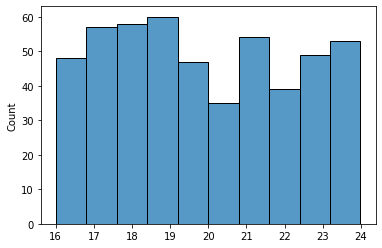

In [173]:
ensayos = 500 
costo_fijo = 30000 
venta = 50
costo_del_producto = np.random.uniform(16, 24, ensayos)
sns.histplot(costo_del_producto)

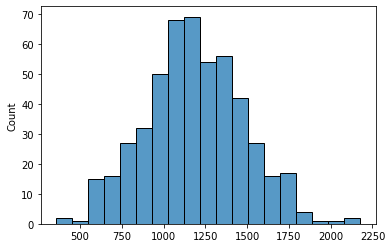

In [174]:
demanda_del_producto= np.random.normal(1200,300, ensayos)
sns.histplot(demanda_del_producto)

EL modelo propuesto es el siguiente: 

1. Costo_fijo = \$30,000
2. $r=$Costo_variable = \$16-24 (probabilístico)
3. Venta_producto = \$50    
4. $d$=Demanda_del_producto (probabilístico) 

$$ganancias =(50-r)*d-30000$$



In [175]:
def ganancias(r,d): 
  ganancias = (50-r)*d-30000
  return ganancias

gan =[]
for i in range(ensayos): 
  ganancias_netas = ganancias(costo_del_producto[i],demanda_del_producto[i])
  gan.append(ganancias_netas)

resultados = pd.DataFrame({"Costo_variable":costo_del_producto,"Demanda_del_producto":demanda_del_producto,"Ganancias":gan})
resultados.head()

,Costo_variable,Demanda_del_producto,Ganancias
0,23.278243,1379.827933,6871.427146
1,19.826628,1096.319001,3079.641314
2,17.097378,770.244998,-4656.920286
3,20.244012,1639.112073,18773.399890
4,19.583178,1546.556349,17041.328931


In [176]:
resultados.describe()

,Costo_variable,Demanda_del_producto,Ganancias
count,500.000000,500.000000,500.000000
mean,19.879422,1185.181021,5656.862486
std,2.306152,293.707075,9109.144913
min,16.011483,356.910834,-18623.353640
25%,17.935632,998.295093,-333.488331
50%,19.721946,1172.523685,5640.045872
75%,21.911792,1382.064135,11449.970862
max,23.989111,2177.870866,42207.254683


>> 1. ¿Cuál es la utilidad media para la simulación? 	


In [177]:
resultados.Ganancias.mean()

5656.862485582329

>> 2. ¿Cuál es la probabilidad de que el proyecto dé por resultado una pérdida?     

In [178]:
contador = 0 
for i in resultados.Ganancias: 
  if i < 0: 
    contador+=1
print(contador/ensayos)

0.266


>> 3. ¿Cuál es su recomendación con respecto a la introducción del producto?	

Parece ser que las probabilidades de que hayan ganancias son mucho mayores a las de las pérdidas; por lo tanto, la simulación da probabilidades bastante positivas; aunque bien se podría modificar el precio de venta y observar otro tipo de resultados con mayores ganancias.



---


> **Problema 3.** Como preparación para la temporada navideña próxima, Mandrell Toy Company diseñó un nuevo muñeco llamado “Freddy”. El costo fijo para producirlo es de \$100,000. El costo variable, el cual incluye el material, la mano de obra y los costos de envío, es de \$34 por muñeco. Durante la temporada navideña, Mandrell venderá los muñecos a \$42 cada uno. Si la empresa sobreproduce los muñecos, los excedentes se venderán en enero por medio de un distribuidor que acordó pagar a Mandrell \$10 por muñeco. La demanda de juguetes nuevos durante esta temporada es extremadamente incierta. Se espera que se vendan 60,000 muñecos con una desviación estándar de 15,000. Se supone que la distribución de probabilidad normal es una buena descripción de la demanda.

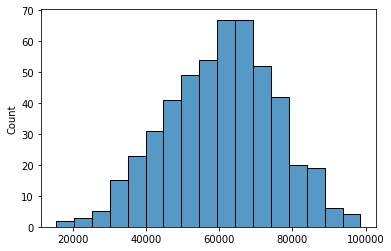

In [179]:
ensayos = 500
costo_fijo = 100000
costos_variable = 34
venta_individual = 42
excedentes = 10 
demanda_del_producto= np.random.normal(60000,15000, ensayos)
sns.histplot(demanda_del_producto)

>>  1. Elabore un modelo estocástico similar al visto en clase (inventario Butler). Incluya columnas que indiquen la demanda, las ventas, los ingresos provenientes de las ventas, cantidad de excedentes, ingresos provenientes de las ventas de los excedentes, el costo total y la utilidad neta. Utilice su modelo para simular las ventas del muñeco Freddy considerando una cantidad de producción de 60,000 unidades. Con 500 ensayos de simulación, ¿Cuál es la estimación de la utilidad media asociada con la producción de 60,000 muñecos?

Modelo propuesto: 

$$ganancias = (42-34)*r-10*(producción-r) -100,000$$

In [180]:
def ganancias(produccion, demanda): 
    gan = (42-34)*demanda-10*(produccion-demanda) -100000
    return gan 

def dataframes_data(demanda_del_producto, produccion): 
  demanda = demanda_del_producto 
  ventas = demanda 
  ingresos = []
  for i in demanda:
    ingresos.append(i*42)
  excedentes = []
  for i in demanda: 
    excedentes.append(produccion-i)
  costo_total = []
  for i in demanda: 
    costo_total.append(34*i+100000)
  gan= []
  for i in demanda: 
    gan.append(ganancias(produccion, i))
  
  resultados = pd.DataFrame({"Demanda":demanda,"Ventas":ventas,"Ingreso_por_ventas":ingresos,"Excedentes":excedentes,"Costo_total":costo_total,"Ganancias":gan})
  return resultados

In [181]:
produccion_60000= dataframes_data(demanda_del_producto, 60000)

In [182]:
produccion_60000.Ganancias.mean()

389271.41528943606

>> 2. Antes de tomar una decisión final sobre la cantidad de producción, la gerencia desea analizar una cantidad de producción más agresiva de 70,000 unidades y una cantidad de producción más conservadora de 50,000 unidades. Ejecute su simulación con estas dos cantidades de producción. ¿Cuál es la utilidad media asociada con cada una? ¿Cuál es su recomendación en relación con la producción del muñeco Freddy? 

In [183]:
produccion_70000= dataframes_data(demanda_del_producto, 70000)
produccion_70000

,Demanda,Ventas,Ingreso_por_ventas,Excedentes,Costo_total,Ganancias
0,74394.081877,74394.081877,3.124551e+06,-4394.081877,2.629399e+06,539093.473779
1,81405.260393,81405.260393,3.419021e+06,-11405.260393,2.867779e+06,665294.687072
2,85166.181267,85166.181267,3.576980e+06,-15166.181267,2.995650e+06,732991.262797
3,61752.448666,61752.448666,2.593603e+06,8247.551334,2.199583e+06,311544.075992
4,59495.188476,59495.188476,2.498798e+06,10504.811524,2.122836e+06,270913.392567
...,...,...,...,...,...,...
495,83531.441088,83531.441088,3.508321e+06,-13531.441088,2.940069e+06,703565.939577
496,62194.129193,62194.129193,2.612153e+06,7805.870807,2.214600e+06,319494.325469
497,53847.492560,53847.492560,2.261595e+06,16152.507440,1.930815e+06,169254.866084
498,60276.547336,60276.547336,2.531615e+06,9723.452664,2.149403e+06,284977.852042


In [184]:
produccion_70000.Ganancias.mean()

289271.41528943594

In [185]:
produccion_50000= dataframes_data(demanda_del_producto, 50000)
produccion_50000

,Demanda,Ventas,Ingreso_por_ventas,Excedentes,Costo_total,Ganancias
0,74394.081877,74394.081877,3.124551e+06,-24394.081877,2.629399e+06,739093.473779
1,81405.260393,81405.260393,3.419021e+06,-31405.260393,2.867779e+06,865294.687072
2,85166.181267,85166.181267,3.576980e+06,-35166.181267,2.995650e+06,932991.262797
3,61752.448666,61752.448666,2.593603e+06,-11752.448666,2.199583e+06,511544.075992
4,59495.188476,59495.188476,2.498798e+06,-9495.188476,2.122836e+06,470913.392567
...,...,...,...,...,...,...
495,83531.441088,83531.441088,3.508321e+06,-33531.441088,2.940069e+06,903565.939577
496,62194.129193,62194.129193,2.612153e+06,-12194.129193,2.214600e+06,519494.325469
497,53847.492560,53847.492560,2.261595e+06,-3847.492560,1.930815e+06,369254.866084
498,60276.547336,60276.547336,2.531615e+06,-10276.547336,2.149403e+06,484977.852042


In [186]:
produccion_50000.Ganancias.mean()

489271.41528943577

Según lo observado en las simulaciones, una producción de 50,000 podría ser mucho más beneficioso que producciones más cuantiosas. Por lo cual, mientras menos productos se hagan, mayor será la ganancia.


>> 3. Suponga que la gerencia de Mandrell adopta su recomendación, ¿Cuál es la probabilidad de que se agoten las existencias de los muñecos Freddy durante la temporada navideña? 

In [187]:
produccion_50000.Demanda.sum()/(50000*ensayos)

1.2103015725438175

Es del 119%. 



---


> **Problema 4.** Considere el proyecto de PortaCom analizado en clase.  

In [188]:
ensayos =500

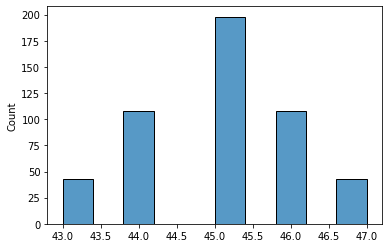

In [189]:
mano_de_obra_directa = np.random.choice([43,44,45,46,47], ensayos, p=[0.1,0.2,0.4,0.2,0.1])
sns.histplot(mano_de_obra_directa)

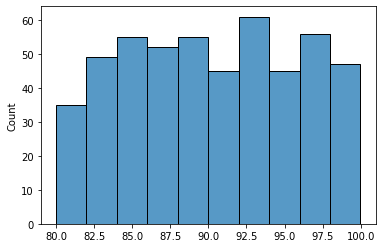

In [190]:
costos_partes = np.random.uniform(80,100,ensayos)
sns.histplot(costos_partes)

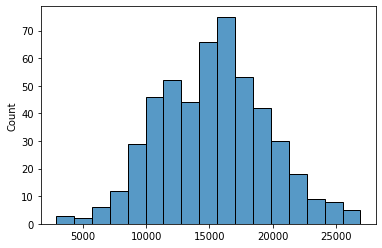

In [191]:
primer_año = np.random.normal(15000,4500,ensayos)
sns.histplot(primer_año)

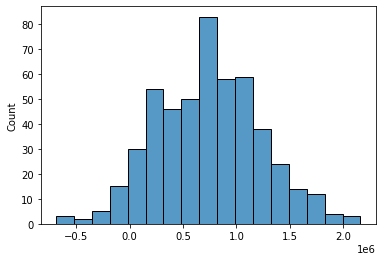

In [192]:
def modelo_ganancias(mano_de_obra_directa, costos_partes, primer_año): 
  ganancias = (249-mano_de_obra_directa-costos_partes)*primer_año-1000000
  return ganancias

ganancias = []

for i in range(ensayos): 
  m = modelo_ganancias(mano_de_obra_directa[i], costos_partes[i], primer_año[i])
  ganancias.append(m)

sns.histplot(ganancias)

In [193]:
resultados = pd.DataFrame({"mano_de_obra_directa":mano_de_obra_directa, 
                           "costos_partes":costos_partes, "primer_año":primer_año,
                           "ganancias":ganancias})
resultados.head()

,mano_de_obra_directa,costos_partes,primer_año,ganancias
0,46,88.935655,16000.779959,825118.487809
1,45,90.343483,17475.536720,986208.632636
2,44,93.863885,15995.031164,777625.625144
3,43,84.782861,8693.685006,53823.619917
4,46,98.142424,9816.430510,29327.104346


In [194]:
resultados.describe(include='all')

,mano_de_obra_directa,costos_partes,primer_año,ganancias
count,500.00000,500.000000,500.000000,5.000000e+02
mean,45.00000,90.259491,15289.055850,7.387133e+05
std,1.05936,5.540476,4241.439292,4.892237e+05
min,43.00000,80.001776,2888.224343,-6.900363e+05
25%,44.00000,85.559887,12088.274357,3.744068e+05
50%,45.00000,90.137312,15462.138756,7.392748e+05
75%,46.00000,95.190890,17957.850183,1.060749e+06
max,47.00000,99.981804,26919.608721,2.162763e+06


>> 1. Un ingeniero integrante del equipo de desarrollo de productos cree que las ventas durante el primer año de la nueva impresora serán de 20,000 unidades. Utilizando estimaciones de \$45 por unidad para el costo de mano de obra directa y de \$90 por unidad para el costo de las piezas, ¿Cuál es la utilidad durante el primer año considerando las estimaciones de las ventas del ingeniero? 


In [195]:
print(modelo_ganancias(45, 90, 20000))

1280000


>> 2. El analista financiero integrante del equipo de desarrollo de productos es más conservador e indica que el costo de las piezas muy bien puede ser de \$100 por unidad. Además, el analista sugiere que un volumen de ventas de 10,000 unidades es más realista. Utilizando el valor más probable de \$45 por unidad para el costo de mano de obra directa, ¿Cuál es la utilidad durante el primer año considerando las estimaciones del analista financiero? 

In [196]:
print(modelo_ganancias(45, 100, 10000))

40000


>> ¿Por qué es preferible el método de simulación al análisis de riesgo para generar varios escenarios de sensibilidad como los sugeridos por el ingeniero y el analista financiero? 

Simplemente, porque en teoría "estamos jugando con el azar". Una opinión como el del analista financiero y el ingeniero solo representa una mínima e ínfima parte de una simulación; por lo cual representa algo súper impreciso. Por lo tanto, una simulación nos ayuda a obtener resultados más robustos y certeros basados en la probabilidad.